In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
dataset=pd.read_csv("Churn_Modelling.csv")

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
#we are finding out the unique characters in each categorical feature
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        num_of_unique_cat = len(dataset[col].unique())
        print("feature '{col_name}' has '{unique_cat}' unique categories".format(col_name = col, unique_cat=num_of_unique_cat))

feature 'Surname' has '2932' unique categories
feature 'Geography' has '3' unique categories
feature 'Gender' has '2' unique categories


In [12]:
# Surname columns has 2932 unique categories we should drop the columns
dataset=dataset.drop("Surname",axis=1)

In [13]:
dataset=dataset.drop("RowNumber",axis=1)

In [14]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset.head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


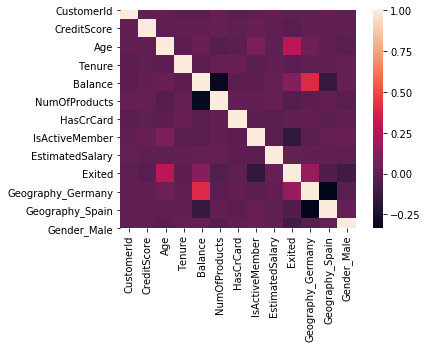

In [15]:
import seaborn as sns
correlation = dataset.corr()
sns.heatmap(correlation.T, square=True, annot=False, fmt="d", cbar=True)

In [16]:
#splitting data from the target
X = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CustomerId           10000 non-null int64
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
Gender_Male          10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [18]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## importing libraby of slipting of data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [21]:
x_train.shape

(8000, 12)

In [22]:
y_train.shape

(8000,)

In [23]:
x_test.shape

(2000, 12)

In [24]:
y_test.shape

(2000,)

# Regression 

### logistic regression : our target variable are in form of 1 and 0 which is binary value , so best fiiting model for binary values are logistic regression.

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
linear = LogisticRegression()

In [82]:
linear.fit(x_train,y_train)

C:\Users\Namrata\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
y_pred = linear.predict(x_test)

In [84]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
linear.score(x_test,y_test)

0.7975

In [86]:
print("regression score is", (linear.score(x_test,y_test)*100))

regression score is 79.75


## Classification algorithems

### feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()


In [34]:
sc.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
x_train_scaled = sc.transform(x_train)

In [36]:
pd.DataFrame(x_train_scaled).head

<bound method NDFrame.head of              0         1         2         3         4         5         6  \
0    -0.202167  0.169582 -0.464608  0.006661 -1.215717  0.809503  0.642595   
1     0.807044 -2.304559  0.301026 -1.377440 -0.006312 -0.921591  0.642595   
2    -1.519081 -1.191196 -0.943129 -1.031415  0.579935 -0.921591  0.642595   
3     1.241115  0.035566  0.109617  0.006661  0.473128 -0.921591  0.642595   
4    -1.110869  2.056114  1.736588  1.044737  0.810193  0.809503  0.642595   
...        ...       ...       ...       ...       ...       ...       ...   
7995 -1.485104 -0.582970 -0.656016 -0.339364  0.703104  0.809503  0.642595   
7996 -0.617785  1.478815 -1.613058 -0.339364  0.613060 -0.921591  0.642595   
7997 -1.632338  0.901515 -0.368904  0.006661  1.361474  0.809503  0.642595   
7998 -0.381732 -0.624205 -0.081791  1.390762 -1.215717  0.809503  0.642595   
7999 -1.375084 -0.284011  0.875251 -1.377440  0.511364 -0.921591  0.642595   

             7         8         

In [37]:
x_test_scaled = sc.transform(x_test)

# Classification algorithems

### 1.SVC (support vector classificatio)

In [38]:
from sklearn.svm import SVC

In [39]:
svc = SVC(C = 1.0, kernel='rbf', random_state = 0)

In [40]:
svc.fit(x_train_scaled,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
y_pred1 = svc.predict(x_test_scaled)

In [42]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
print ("accuracy score is ", accuracy_score(y_test,y_pred1)*100)

accuracy score is  86.4


### 2. desicion tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
ds = DecisionTreeClassifier()

In [47]:
ds.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
y_pred2 = ds.predict(x_test)

In [49]:
print ("accuracy score is ", accuracy_score(y_test,y_pred2)*100)

accuracy score is  78.64999999999999


### 3.Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
rf = RandomForestClassifier(n_estimators = 500 , random_state = 0 )

In [64]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
y_pred3 = rf.predict(x_test)

In [66]:
print ("accuracy score is ", accuracy_score(y_test,y_pred3)*100)

accuracy score is  86.45


### 4.K_nabour classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
kn = KNeighborsClassifier()

In [70]:
kn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [71]:
y_pred5 = kn.predict(x_test)

In [72]:
print (" accuracy is", accuracy_score(y_test,y_pred5)*100)

 accuracy is 75.94999999999999


### 5. Naive bays

In [75]:
from sklearn.naive_bayes import GaussianNB 

In [76]:
ng = GaussianNB()

In [77]:
ng.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
y_pred6 = ng.predict(x_test)

In [79]:
print ("accuracy is ", accuracy_score(y_test,y_pred6)*100)

accuracy is  78.3


## Support vector classifier and random forest classifier  giving same score. accuracy of these models are 86.4 